This script plot the chamber temperature and ambient temperature in field campaign in Sacramento and Pasadena, CA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sacramento, April ~ May 2020

In [97]:
# chamber profile
df_chamber_sacramento = \
    pd.read_csv('../../data/raw/Chamber/T_RH_chamber_2020_sacramento.csv', skiprows=7)
df_chamber_sacramento = df_chamber_sacramento[df_chamber_sacramento['LogDate'].notna()]
df_chamber_sacramento.columns = ['DataPoint','LogDate', 'LogTime', 'RH', 'temperature']
df_chamber_sacramento['datetime'] = \
    pd.to_datetime(df_chamber_sacramento['LogDate']+' '+df_chamber_sacramento['LogTime'])
df_chamber_sacramento['date'] = df_chamber_sacramento['datetime'].dt.date
df_chamber_sacramento['time'] = df_chamber_sacramento['datetime'].dt.strftime('%H:%M')
df_chamber_sacramento['hours'] = \
    df_chamber_sacramento['datetime'].dt.hour + \
    df_chamber_sacramento['datetime'].dt.minute/60

In [98]:
# ambient profile
df_ambient_sacramento = \
    pd.read_csv('../../data/raw/AQMD/TEMP_PICKDATA_2020-12-20_sacramento.csv')
df_ambient_sacramento = df_ambient_sacramento[df_ambient_sacramento['start_hour'].notna()]
df_ambient_sacramento['date'] = pd.to_datetime(df_ambient_sacramento['date'])
df_ambient_sacramento['value'] = (df_ambient_sacramento['value']-32)*5/9

In [99]:
# groupby to get mean
df_chamber_sacramento_stat = \
    df_chamber_sacramento.groupby('hours').agg({'temperature':['mean','std'], 
                                                'RH':['mean','std']}).reset_index()

df_ambient_sacramento_stat = \
    df_ambient_sacramento[(df_ambient_sacramento['date']>='2020-04-14')&
                          (df_ambient_sacramento['date']<'2020-05-07')].\
        groupby('start_hour').agg({'value':['mean','std']}).reset_index()

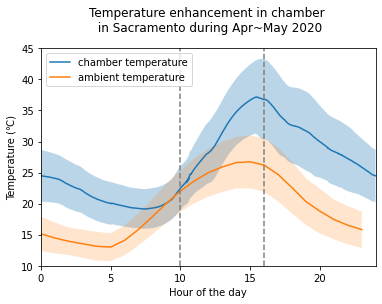

In [100]:
plt.plot(df_chamber_sacramento_stat['hours'], 
         df_chamber_sacramento_stat['temperature']['mean'], 
         label='chamber temperature')
plt.fill_between(df_chamber_sacramento_stat['hours'],
                df_chamber_sacramento_stat['temperature']['mean']-\
                    df_chamber_sacramento_stat['temperature']['std'],
                df_chamber_sacramento_stat['temperature']['mean']+\
                    df_chamber_sacramento_stat['temperature']['std'],
                alpha=0.3)
plt.plot(df_ambient_sacramento_stat['start_hour'], 
         df_ambient_sacramento_stat['value']['mean'], 
         label='ambient temperature')
plt.fill_between(df_ambient_sacramento_stat['start_hour'],
                df_ambient_sacramento_stat['value']['mean']-\
                    df_ambient_sacramento_stat['value']['std'],
                df_ambient_sacramento_stat['value']['mean']+\
                    df_ambient_sacramento_stat['value']['std'],
                alpha=0.2)
plt.axvline(x=10, c='grey', linestyle='--')
plt.axvline(x=16, c='grey', linestyle='--')

plt.xlim(0,24)
plt.ylim(10,45)
plt.xlabel('Hour of the day')
plt.ylabel('Temperature (℃)')
plt.legend(loc='upper left')
plt.title('Temperature enhancement in chamber \n in Sacramento during Apr~May 2020', y=1.05)

plt.savefig('../../result/temperature_chamber_sacramento_2020_apr_may.png', dpi=1200, bbox_inches='tight')

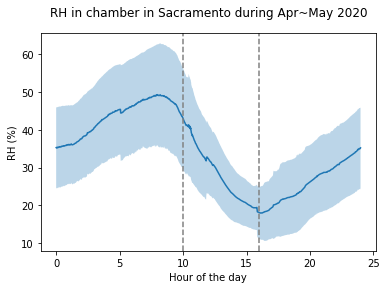

In [106]:
# plot RH
plt.plot(df_chamber_sacramento_stat['hours'], 
         df_chamber_sacramento_stat['RH']['mean'], 
         label='chamber RH')
plt.fill_between(df_chamber_sacramento_stat['hours'],
                df_chamber_sacramento_stat['RH']['mean']-\
                    df_chamber_sacramento_stat['RH']['std'],
                df_chamber_sacramento_stat['RH']['mean']+\
                    df_chamber_sacramento_stat['RH']['std'],
                alpha=0.3)
plt.axvline(x=10, c='grey', linestyle='--')
plt.axvline(x=16, c='grey', linestyle='--')

plt.xlabel('Hour of the day')
plt.ylabel('RH (%)')
plt.title('RH in chamber in Sacramento during Apr~May 2020', y=1.05)
plt.savefig('../../result/RH_chamber_sacramento_2020_apr_may.png', dpi=1200, bbox_inches='tight')

## Pasadena August, 2021

In [84]:
# chamber profile
df1 = pd.read_csv('../../data/raw/Chamber/Pasadena/Temp/2021_07_22.csv', skiprows=7)
df1 = df1[df1['LogDate'].notna()]
df2 = pd.read_csv('../../data/raw/Chamber/Pasadena/Temp/2021_07_28.csv', skiprows=7)
df2 = df2[df2['LogDate'].notna()]
df3 = pd.read_csv('../../data/raw/Chamber/Pasadena/Temp/2021_08_14.csv', skiprows=7)
df3 = df3[df3['LogDate'].notna()]
df_chamber_pasadena = pd.concat([df1, df2, df3])

# clean df
df_chamber_pasadena.columns = ['DataPoint','LogDate', 'LogTime', 'RH', 'temperature']
df_chamber_pasadena['temperature'] = (df_chamber_pasadena['temperature']-32)*5/9
df_chamber_pasadena['datetime'] = \
    pd.to_datetime(df_chamber_pasadena['LogDate']+' '+df_chamber_pasadena['LogTime'])
df_chamber_pasadena['date'] = df_chamber_pasadena['datetime'].dt.date
df_chamber_pasadena['time'] = df_chamber_pasadena['datetime'].dt.strftime('%H:%M')
df_chamber_pasadena['hours'] = \
    df_chamber_pasadena['datetime'].dt.hour + \
    df_chamber_pasadena['datetime'].dt.minute/60


In [85]:
# ambient profile
df_ambient_pasadena = \
    pd.read_csv('../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_PA.csv')
df_ambient_pasadena = df_ambient_pasadena[df_ambient_pasadena['start_hour'].notna()]
df_ambient_pasadena['date'] = pd.to_datetime(df_ambient_pasadena['date'])
df_ambient_pasadena['value'] = (df_ambient_pasadena['value']-32)*5/9

In [90]:
# groupby to get mean
df_chamber_pasadena_stat = \
    df_chamber_pasadena.groupby('hours').agg({'temperature':['mean','std'], 
                                                'RH':['mean','std']}).reset_index()

df_ambient_pasadena_stat = \
    df_ambient_pasadena[(df_ambient_pasadena['date']>='2021-07-15')&
                          (df_ambient_pasadena['date']<'2021-08-01')].\
        groupby('start_hour').agg({'value':['mean','std']}).reset_index()

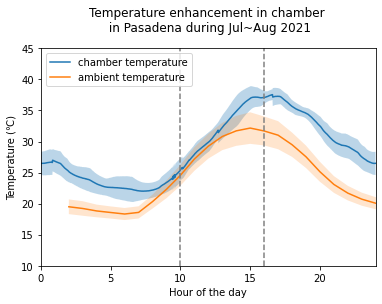

In [101]:
plt.plot(df_chamber_pasadena_stat['hours'], 
         df_chamber_pasadena_stat['temperature']['mean'], 
         label='chamber temperature')
plt.fill_between(df_chamber_pasadena_stat['hours'],
                df_chamber_pasadena_stat['temperature']['mean']-\
                    df_chamber_pasadena_stat['temperature']['std'],
                df_chamber_pasadena_stat['temperature']['mean']+\
                    df_chamber_pasadena_stat['temperature']['std'],
                alpha=0.3)
plt.plot(df_ambient_pasadena_stat['start_hour']+2,
            df_ambient_pasadena_stat['value']['mean'], 
            label='ambient temperature')
plt.fill_between(df_ambient_pasadena_stat['start_hour']+2,
                df_ambient_pasadena_stat['value']['mean']-\
                    df_ambient_pasadena_stat['value']['std'],
                df_ambient_pasadena_stat['value']['mean']+\
                    df_ambient_pasadena_stat['value']['std'],
                alpha=0.2)
plt.axvline(x=10, c='grey', linestyle='--')
plt.axvline(x=16, c='grey', linestyle='--')

plt.xlim(0,24)
plt.ylim(10,45)
plt.xlabel('Hour of the day')
plt.ylabel('Temperature (℃)')
plt.legend(loc='upper left')
plt.title('Temperature enhancement in chamber \n in Pasadena during Jul~Aug 2021', y=1.05)

plt.savefig('../../result/temperature_chamber_pasadena_2021_jul_aug.png', dpi=1200, bbox_inches='tight')

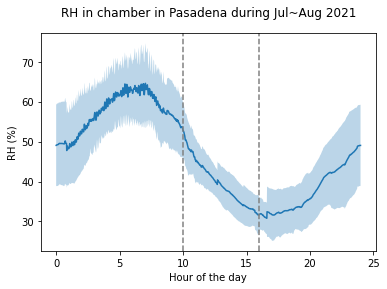

In [107]:
# plot RH
plt.plot(df_chamber_pasadena_stat['hours'], 
         df_chamber_pasadena_stat['RH']['mean'], 
         label='chamber RH')
plt.fill_between(df_chamber_pasadena_stat['hours'],
                df_chamber_pasadena_stat['RH']['mean']-\
                    df_chamber_pasadena_stat['RH']['std'],
                df_chamber_pasadena_stat['RH']['mean']+\
                    df_chamber_pasadena_stat['RH']['std'],
                alpha=0.3)
plt.axvline(x=10, c='grey', linestyle='--')
plt.axvline(x=16, c='grey', linestyle='--')

plt.xlabel('Hour of the day')
plt.ylabel('RH (%)')
plt.title('RH in chamber in Pasadena during Jul~Aug 2021', y=1.05)
plt.savefig('../../result/RH_chamber_pasadena_2021_jul_aug.png', dpi=1200, bbox_inches='tight')